In [54]:

import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
import seaborn as sns


In [55]:
file_path = "/Users/harikatamma/Downloads/DATA606/framingham.csv"

# Read the CSV file into a DataFrame
data_frame = pd.read_csv(file_path)


In [5]:
data_frame.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#Shape of dataset

print ('No. of Records :', data_frame.shape[0], '\nNo. of Features : ', data_frame.shape[1])

No. of Records : 4240 
No. of Features :  16


In [7]:
# Find the size of the dataset (number of rows * number of columns)
dataset_size = data_frame.shape[0] * data_frame.shape[1]

print("Size of the dataset:", dataset_size)


Size of the dataset: 67840


In [8]:
#Size of dataset

# Calculate memory usage of the DataFrame in bytes
memory_usage_bytes = data_frame.memory_usage(deep=True).sum()

# Convert bytes to megabytes (MB)
memory_usage_mb = memory_usage_bytes / (1024 * 1024)
print("Size of the dataset:", memory_usage_mb, "MB")

# Convert megabytes to gigabytes (GB)
memory_usage_gb = memory_usage_mb / 1024
print("Size of the dataset:", memory_usage_gb, "GB")


Size of the dataset: 0.5177001953125 MB
Size of the dataset: 0.0005055665969848633 GB


In [9]:
#Let us check datset's attribute info

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [10]:
data_frame.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Observations :

1. Some the features are Discrete so let us analyze continuous ones
2. Age : We can see that Min. age of subject found in given records is 32 while Max. being 70. So our values are ranging from 32 to 70.
3. cigsPerDay : Subject smoking Cig. per day is as low as nill while we have 70 Cigs. per day making the Peak.
4. totChol : Min. Cholesterol level recorded in our dataset is 107 while Max. is 696.
5. sysBP : Min. Systolic Blood Pressure observed in Subject is 83 while Max. is 295.
6. diaBP : Min. Diastolic Blood Pressure observed in Subject is 48 while Max. is 142.
7. BMI : Body Mass Index in our dataset ranges from 15.54 to 56.
8. heartRate : Observed Heartrate in our case study is 44 to 143.
9. glucose : Glucose sugar level range is 40 to 394.

In [11]:
#Examining Null values in each feature

data_frame.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## <a class="anchor" id="third-bullet"></a>  Handle missing data from the dataset by using median


In [12]:
#User defined function for missing value imputation

def imputation_median(data):
    return data.fillna(data.median())

In [13]:
#median imputation

data_frame.glucose = data_frame['glucose'].transform(imputation_median)
data_frame.education = data_frame['education'].transform(imputation_median)
data_frame.heartRate = data_frame['heartRate'].transform(imputation_median)
data_frame.totChol = data_frame['totChol'].transform(imputation_median)
data_frame.BPMeds = data_frame['BPMeds'].transform(imputation_median)

## group by classes that are in relation with other classes

by_currentSmoker = data_frame.groupby(['currentSmoker'])
data_frame.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(imputation_median)

by_age = data_frame.groupby(['male','age'])
data_frame.BMI = by_age['BMI'].transform(imputation_median)

In [14]:
data_frame = data_frame.dropna(how = 'any', axis = 0)
print(data_frame.shape)
data_frame.head()

(4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
#Rechecking for any missing value left

data_frame.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
#Shape of dataset

print ('No. of Records :', data_frame.shape[0], '\nNo. of Features : ', data_frame.shape[1])

No. of Records : 4240 
No. of Features :  16


## <a class="anchor" id="fourth-bullet"></a> Descriptive Statistics

In [17]:
print('Gender')
print(data_frame['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(data_frame['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(data_frame['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(data_frame['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(data_frame['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(data_frame['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
0    0.570755
1    0.429245
Name: male, dtype: float64
----


Education
1.0    0.405660
2.0    0.320283
3.0    0.162500
4.0    0.111557
Name: education, dtype: float64
----


BP Medication
0.0    0.970755
1.0    0.029245
Name: BPMeds, dtype: float64
----


Stroke
0    0.994104
1    0.005896
Name: prevalentStroke, dtype: float64
----


Hypertension
0    0.689387
1    0.310613
Name: prevalentHyp, dtype: float64
----


Diabetes
0    0.974292
1    0.025708
Name: diabetes, dtype: float64
----




## Conclusion taken from above results-


1. Given the assumption that 0 is female and 1 is male, 57% is female and 42% is male.
2. The majority of patients in the database (more than 60%) have education levels below level 2 and lower
3. Of the patients, 97% do not take BP medication.
4. 99 percent of people have never experienced a stroke 
5. About 69% of consumers do not have hypertension and 31% have
6. 97% users are not diabetic


In [19]:
data_frame['totChol'].max()

696.0

In [20]:
data_frame['sysBP'].max()


295.0

In [22]:
data_frame = data_frame[data_frame['totChol']<696.0]
data_frame = data_frame[data_frame['sysBP']<295.0]
data_frame.shape

(4237, 16)

##   Exploratory Data Analysis

<AxesSubplot:>

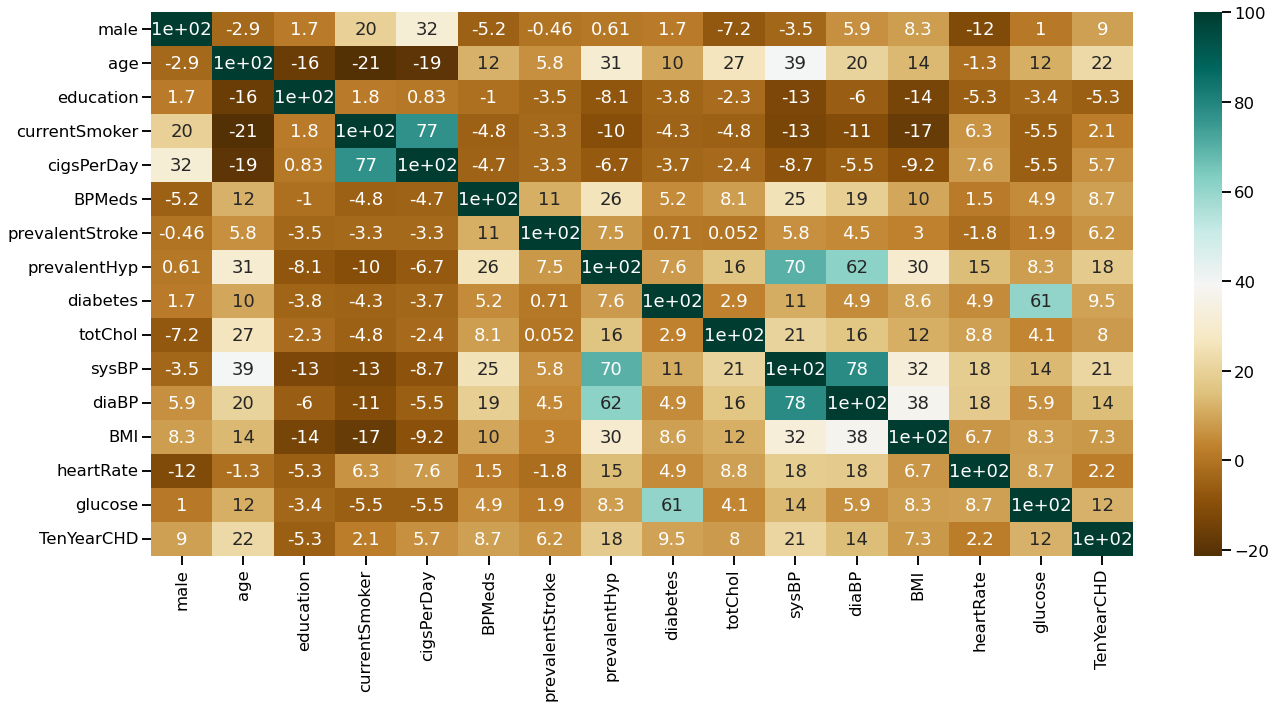

In [26]:
sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(data_frame.corr()*100, annot=True, cmap='BrBG')

SysBP and diaBP appear to be quite strongly correlated, and there is a negative connection between education and the output variable. Therefore, we will subsequently delete this column.



In [27]:
categorical_features = ['male','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for feature in categorical_features:
    print(feature,':')
    print(data_frame[feature].value_counts())
    print("-----------------")

male :
0    2418
1    1819
Name: male, dtype: int64
-----------------
currentSmoker :
0    2143
1    2094
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    4113
1.0     124
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    4212
1      25
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2923
1    1314
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    4129
1     108
Name: diabetes, dtype: int64
-----------------


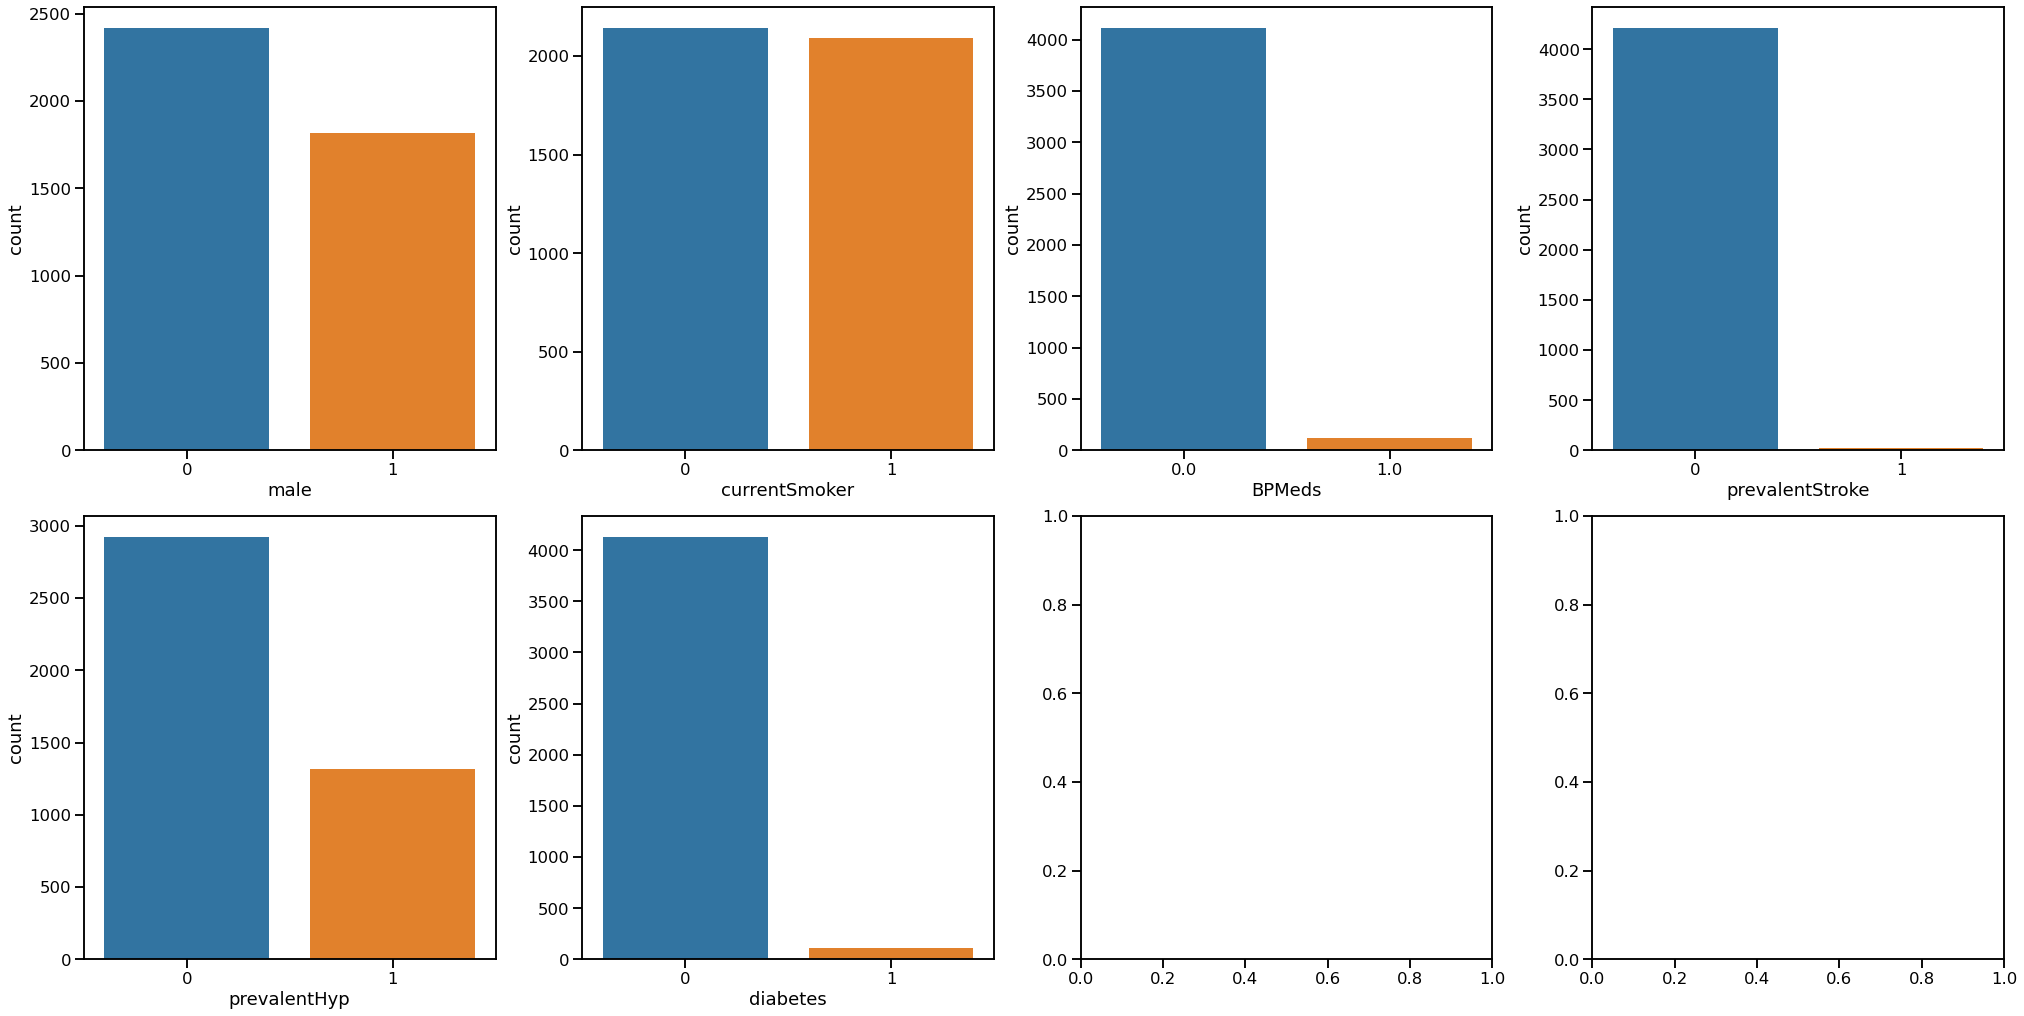

In [28]:
num_plots = len(categorical_features)
total_cols = 4
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data_frame, ax=axs[row][pos])

Among the categorical features:
There are four levels of education whereas the rest categorical features are all binary. The number of Smokers and non-Smokers in currentSmoker is almost the same.BPmeds, prevalentStroke and diabetes are highly imbalanced.

Text(0.5, 1.0, 'CHD by Gender')

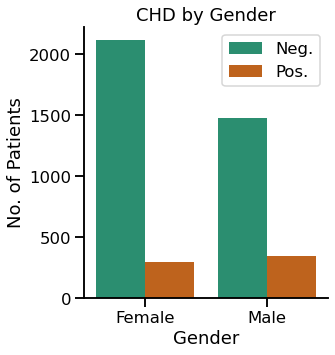

In [29]:
#Chronic Heart Disease(CHD) by Gender Viz.

sns.catplot(x='male', hue='TenYearCHD', data=data_frame, kind='count', palette='Dark2', legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

Observation:

1. The bivariate analysis plot above shows the prevalence and absence of chronic heart disease (CHD) by gender.
2. Our observations indicate that there are far too many people in our dataset who do not have CHD.
3. Negative: Between 80 and 90 percent of females and 60 to 70 percent of males belong to the negative category.
4. positive: CHD affects roughly 10% of both male and female individuals.
5. Based on this, we can conclude that our dataset is unbalanced, with roughly 80–90% of the classifications being negative and 10–15% being positive.

/var/folders/m9/9mmcgvy17lj8pf2969ys98cc0000gn/T/ipykernel_48448/1772763241.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_frame.hist(ax = ax)


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

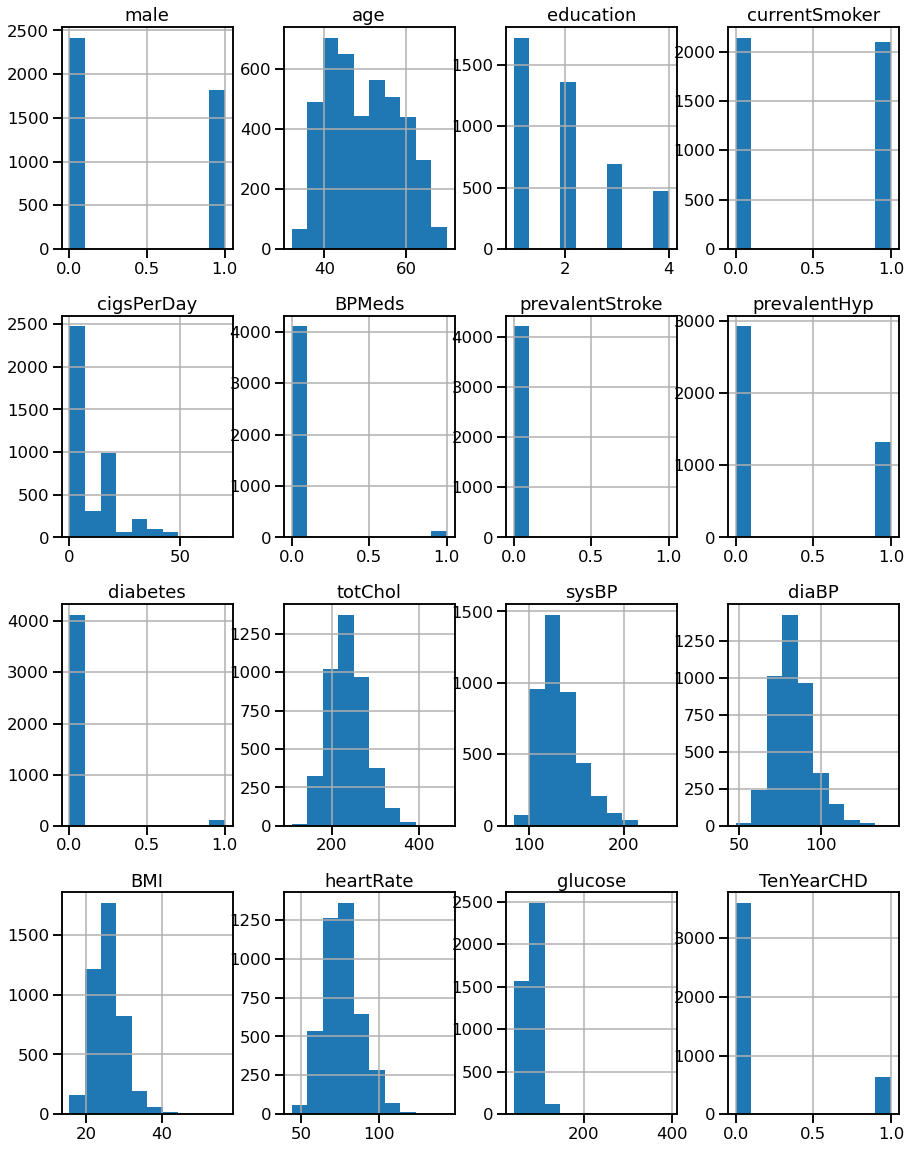

In [30]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_frame.hist(ax = ax)

/Users/harikatamma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harikatamma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harikatamma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

Text(0.5, 1.0, 'Distribution of HeartRate')

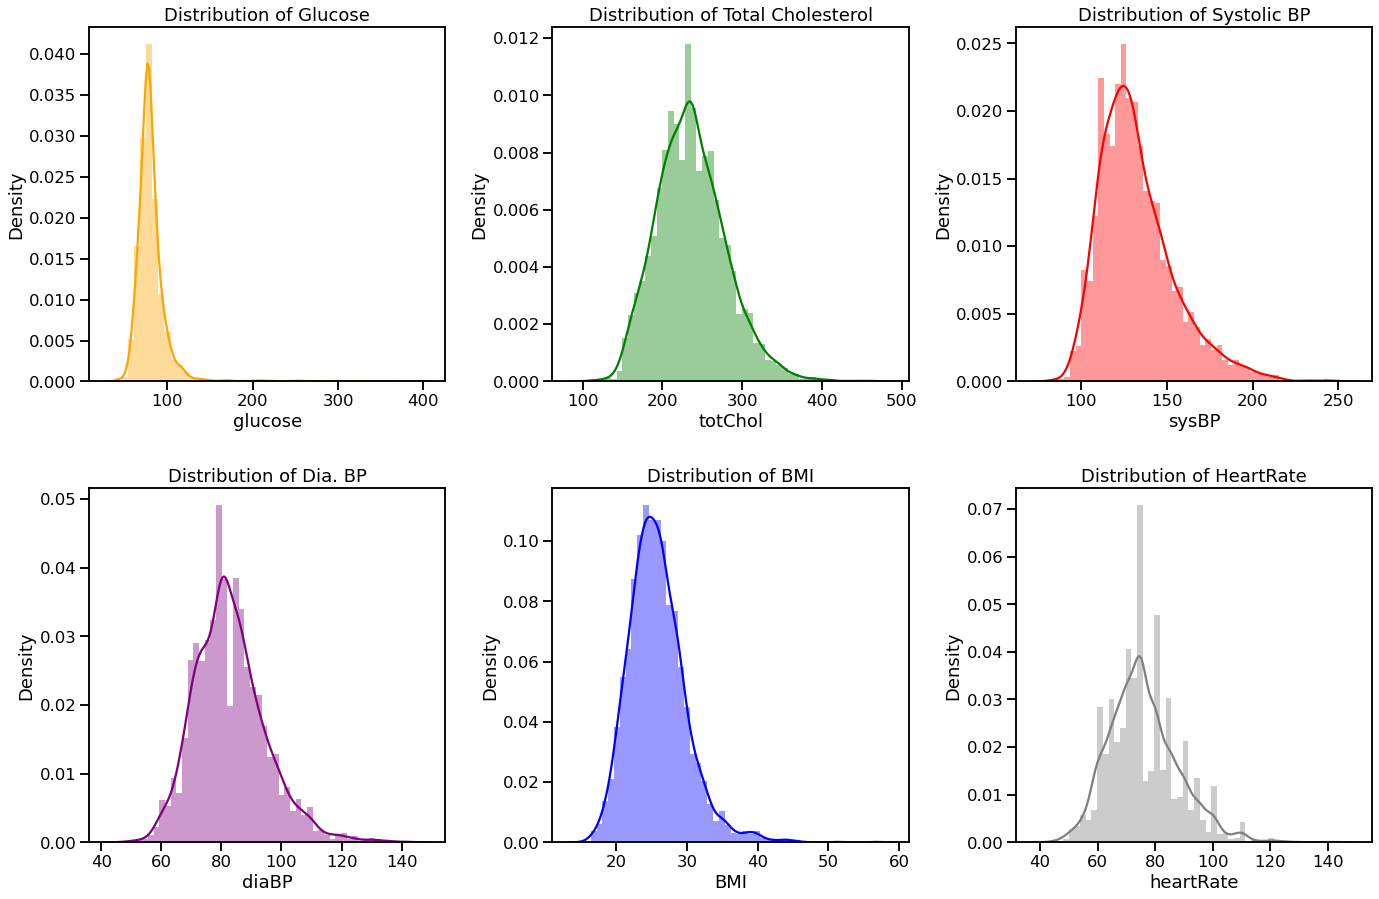

In [31]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(data_frame['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(data_frame['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(data_frame['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(data_frame['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(data_frame['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(data_frame['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

Observations :

We can see Glucose, Total Cholesterol, Systolic BP & BMI is Right Skewed.

While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution

/Users/harikatamma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Agewise distribution of the patients')

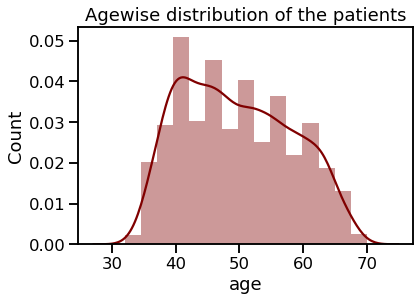

In [32]:
sns.distplot(data_frame['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

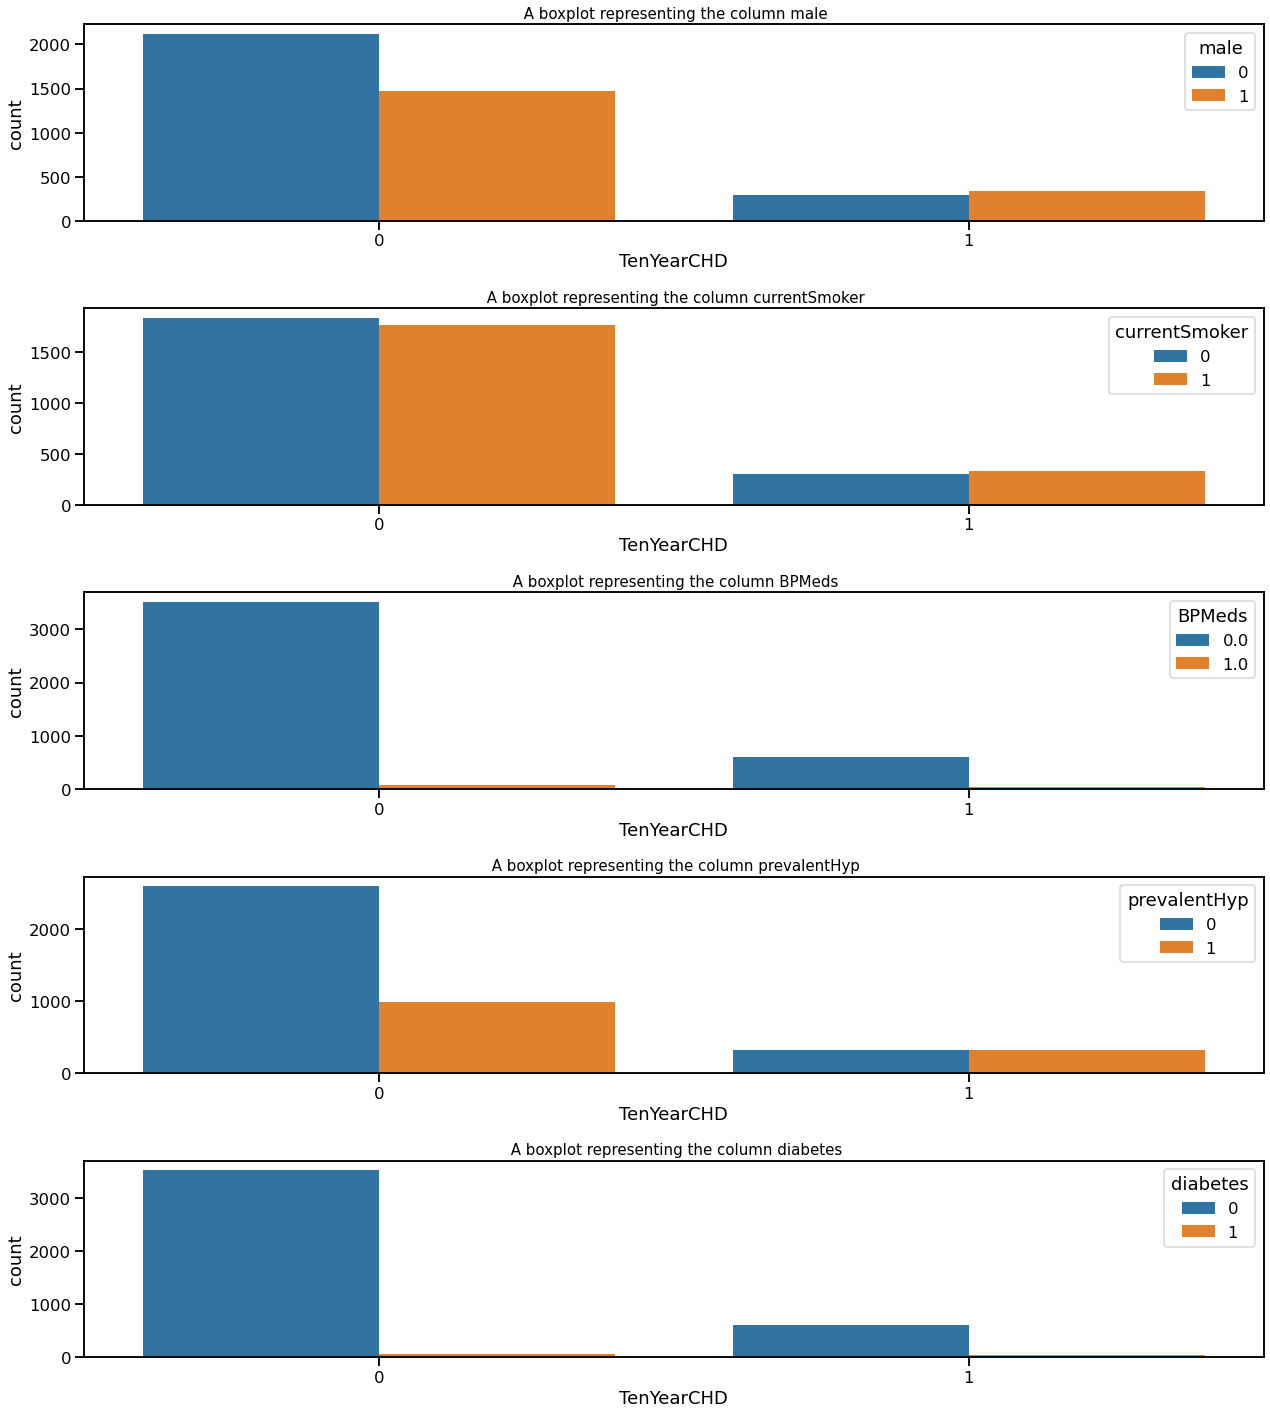

In [33]:
dataset_binary = ['male', 'currentSmoker','BPMeds','prevalentHyp', 'diabetes']

fig, ax = plt.subplots (len(dataset_binary), figsize = (18, 20))
for n,k in enumerate(dataset_binary):
    sns.countplot(x=data_frame['TenYearCHD'], hue = data_frame[k], ax=ax[n])
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)

## The above plots show that male and Current Smokers are at high risk of getting a heart disease

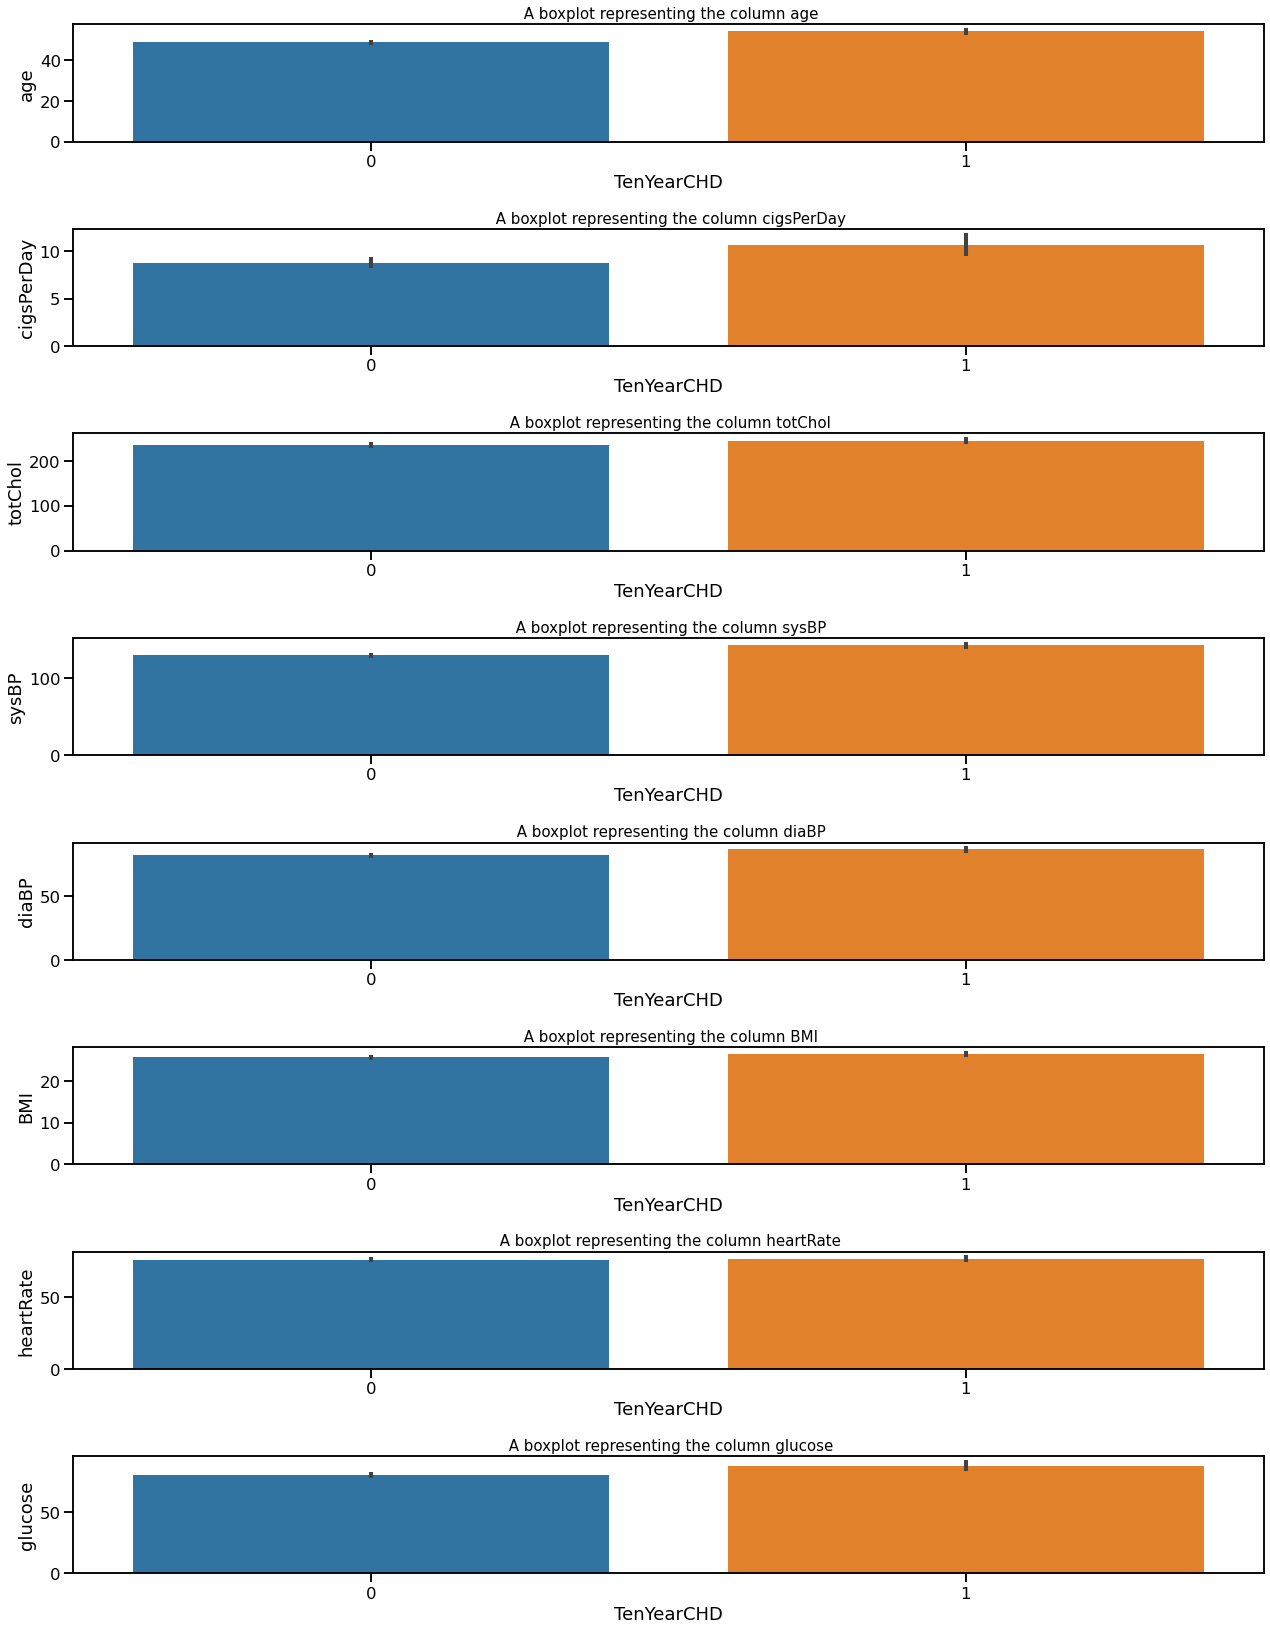

In [35]:
dataset_num = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
fig, ax = plt.subplots (len(dataset_num), figsize = (18, 23))
for n,k in enumerate(dataset_num):
    sns.barplot(x=data_frame['TenYearCHD'], y = data_frame[k], ax=ax[n])
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)

Observation :

Subjects ranging from Age 40 to 50 are in Majority followed by 50 to 70.

In [36]:
#User-defined function

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
data_frame['enc_hr'] = data_frame['heartRate'].apply(heartrate_enc)
data_frame['encode_age'] = data_frame['age'].apply(lambda x : encode_age(x))

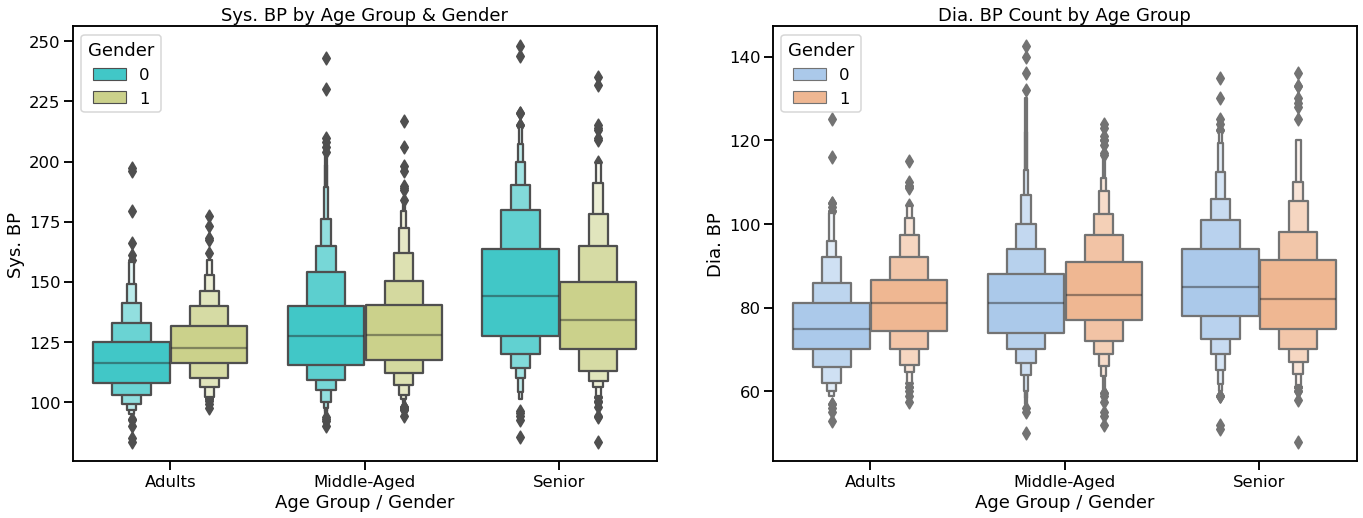

In [37]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=data_frame, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=data_frame, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

Observations :

Sys. BP by Age Group & Gender : Sys. BP is Increasing by Age Group and Gender.
Dia. BP by Age Group & Gender : Similar to Sys. BP , the Dia. BP is seen Increasing by Age Group & Gender.

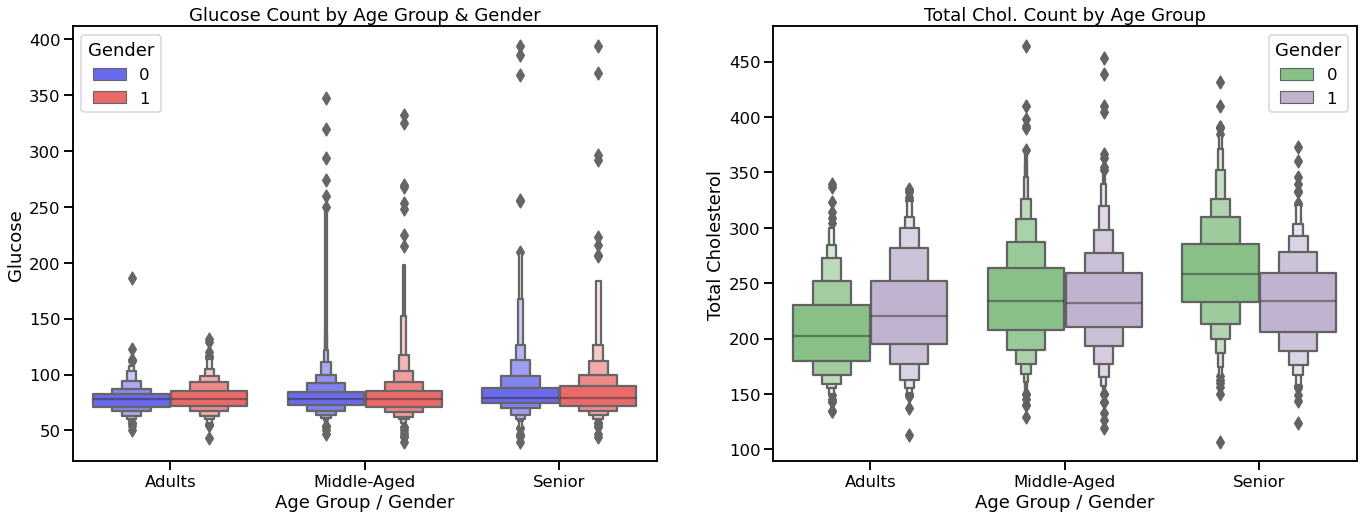

In [39]:
#Multivariate Analysis Pt. 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=data_frame, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=data_frame, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

Observations :

Glucose Count by Age Group & Gender : We can clearly observe that as Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.
Total Cholesterol by Age Group & Gender : Excluding Outliers, Observation make us Clear that for females Cholesterol level is Increasing by Age considering the Quantile (25%, 50%, 75%) values into account. While, for Males the Cholesterol level Quantile is Approx. Similar for each Age Group.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

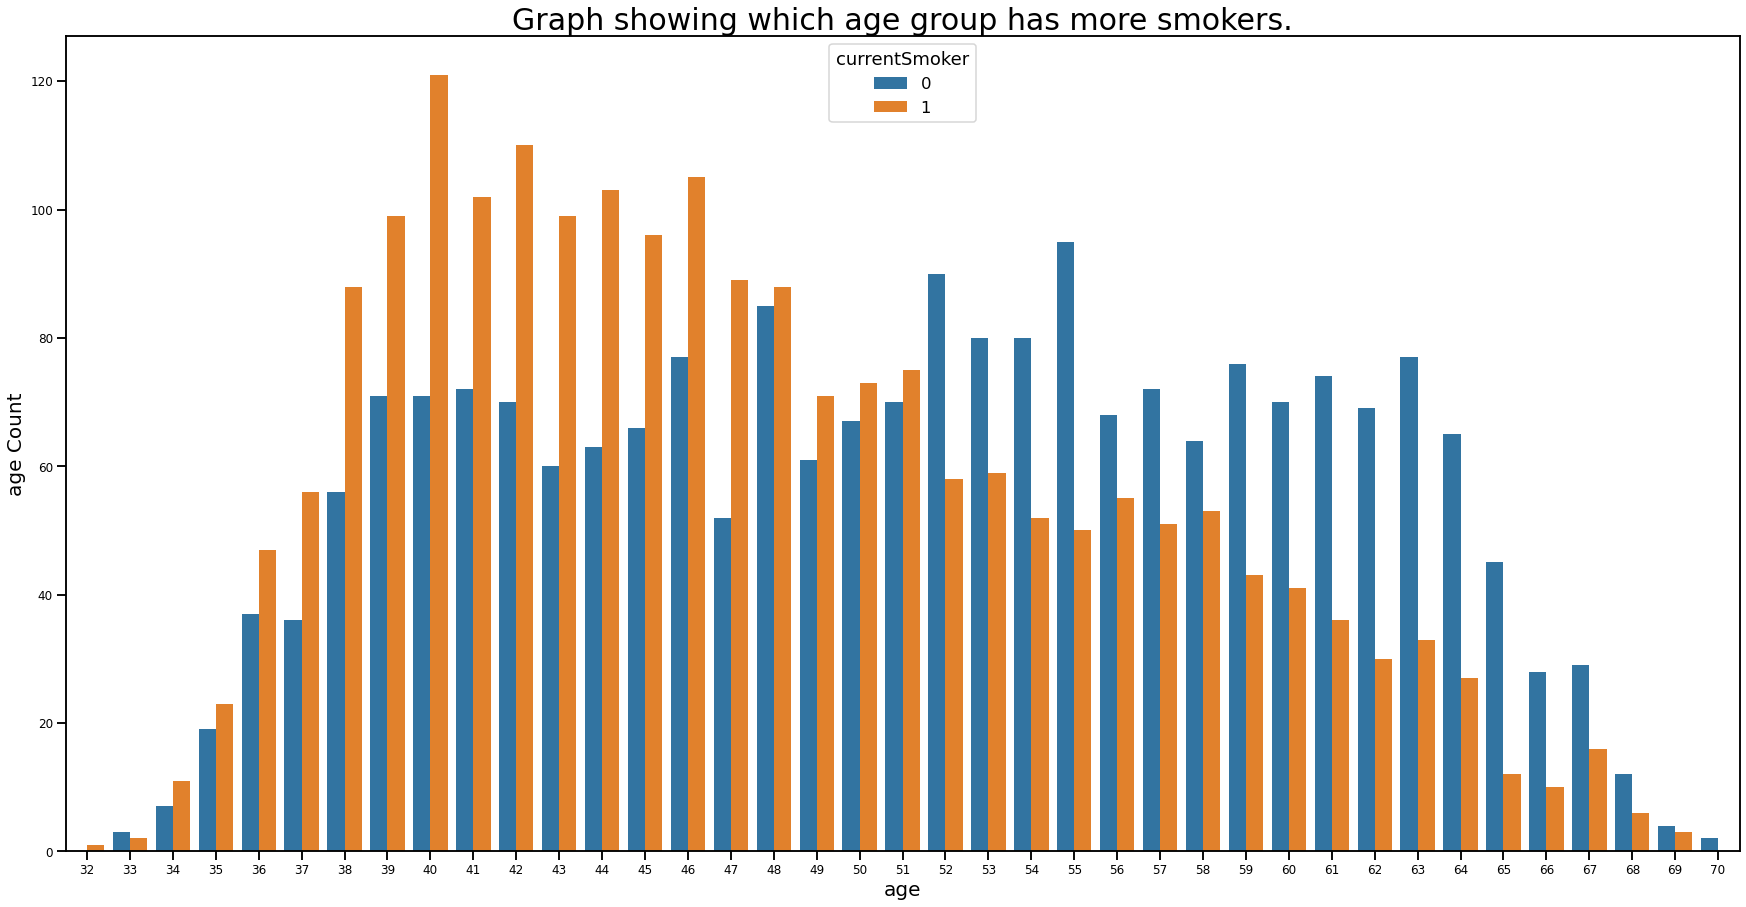

In [41]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data_frame,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

## Observation-
Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
No currentSmokers observed below the age of 32
maximum age for a currentSmokers is 70

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

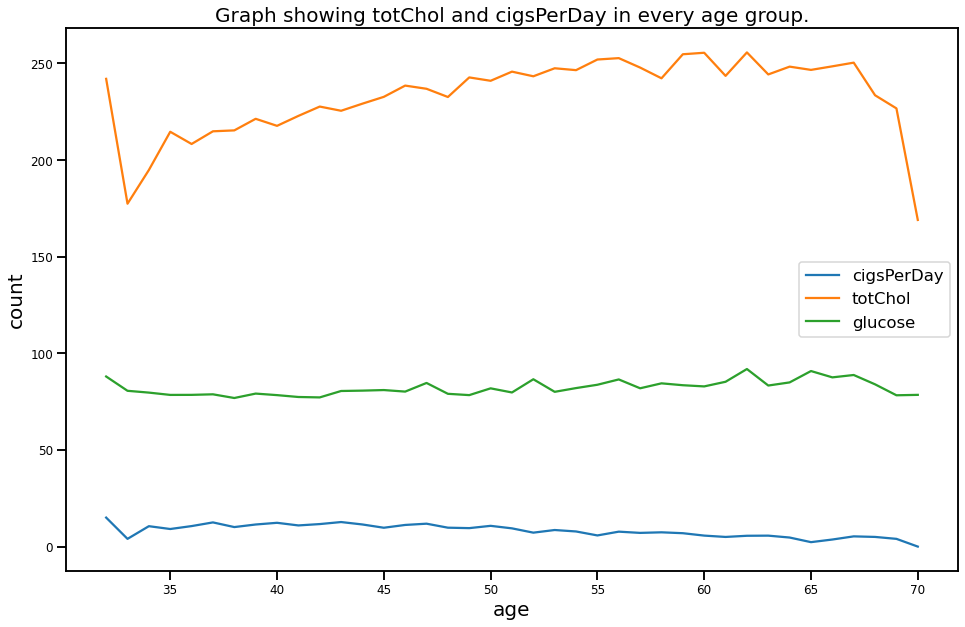

In [47]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

var1 = data_frame.groupby("age").cigsPerDay.mean()
var2 = data_frame.groupby("age").totChol.mean()
var3 = data_frame.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=var1, label="cigsPerDay")
sns.lineplot(data=var2, label="totChol")
sns.lineplot(data=var3, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is a minor relation between totChol and glucose. cigsPerDay has a fairly parallel relationship with age.

Text(0.5, 1.0, 'Target Class Count')

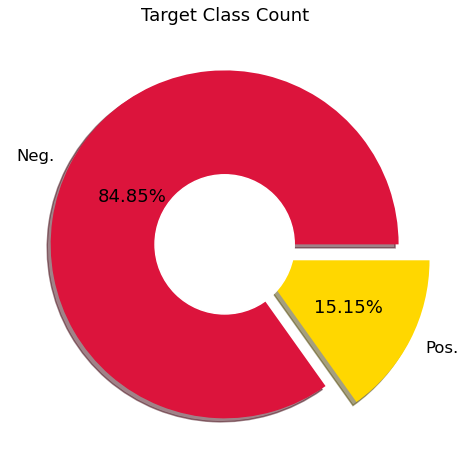

In [48]:
plt.figure(figsize=(8,8))
plt.pie(data_frame['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

In [49]:
data_frame.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [ ]:
# Dropping columns education
data_frame = data_frame.drop(['education'], axis=1)


In [52]:
data_frame.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1
